<div style="padding:20px;
            color:White;
            margin:0;
            font-size:250%;
            border-width: 1px;
            border-style: solid;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#3474eb;
            overflow:hidden;
            font-family: Trebuchet MS;
            font-weight:600">Credit Card Fraud Detection </div>

<center>
    <div style="border-width: 1px;
                border-style: solid;
                border-radius:5px;
                background-color:#636361;
                overflow:hidden;
                font-family: Trebuchet MS;
                font-weight:400;
                font-size:150%;
                color:White;
                padding:10px;
                margin:10px;
                width: 90%;
                display:fill;
                text-align:center">Transactions and Protection</div>
</center>



<center> 

![CCFD](../images/ccImgage.png)
</center>

 
This project is a Flask application for feature analysis involving machine learning algorithms to detect fraud within credit card transactions; with the additional feature⎯a recommender system for fraud protection services. 

The data here is provided in a CSV format and has more than 20 million transactions generated from a multi-agent virtual world simulation performed by IBM. The data covers 2000 (synthetic) consumers that reside within the United States, but who are also world travellers. 

The data is provided by IBM and is available on Kaggle. The data is also available on the IBM Cloud Object Storage (COS) service and can be found here [Data](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/creditcard.csv)
​ 
​
<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #86a0cf;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Table of Contents
    </h3>
</div>

<a id="toc"></a>


- [1. Exploratory Data Analysis](#1)
    - [Importing Libraries](#1.1)
    - [Importing Data](#1.2)
    - [Exploring Data](#1.3)
    - [Data Visualization](#1.4)

- [2. Data Preprocessing](#2)
    - [Data Cleaning](#2.1)
    - [Feature Selection](#2.2)
    - [Data Splitting](#2.3)

- [3. Machine Learning Models](#3)
    - [Logistic Regression](#3.1)
    - [K-Nearest Neighbors](#3.2)
    - [Decision Tree](#3.3)
    - [Support Vector Machine](#3.4)
    - [XGBoost](#3.5)
    - [LGBClassifier](#3.6)
    - [Model Evaluation](#3.7)

<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #CE7BB0;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">1.  Exploratory Data Analysis
    </h3>
</div>

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. EDA is used for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. EDA is used for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


####  Importing Libraries <a class='anchor' id='images'></a> [↑](#top)

In [8]:
# Basic imports
import sys
import seaborn as sns
import pandas as pd
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import lightgbm as lgb
from lightgbm import plot_importance
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

print(f'Seaborn Version: {sns.__version__}')
print(f'Numpy Version:{np.__version__}')
print(f'LGB Version: {lgb.__version__}')
print(f'Pandas Version: {pd.__version__}')
print(f'Sklearn Version: {sklearn.__version__}')

Seaborn Version: 0.11.2
Numpy Version:1.23.3
LGB Version: 3.3.2
Pandas Version: 1.3.5
Sklearn Version: 1.1.2


#### Reading in Data <a class='anchor' id='images'></a> [↑](#top)

Dataset has over 20 million transactions and 15 features. The data is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. 

In [9]:
# Import the dataset over 24M rows
df =  pd.read_csv('/Users/jasonrobinson/Documents/Projects/AllData/cc-transact-csv/credit_card_transactions-ibm_v2.csv')
print(f'Shape of the dataset: {df.shape}')
df.head()

Shape of the dataset: (24386900, 15)


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


#### Missing Values<a class='anchor' id='images'></a> [↑](#top)

Since we are missing almost all data for the `Error?` feature, we will drop it from the dataset. 

`Merchant State` and `Zip` will involve data imputation to replace the missing values with the **mean**.

In [ ]:
# Check for missing values - Errors?, Merchant State, Zip
df.isnull().sum()

User                     0
Card                     0
Year                     0
Month                    0
Day                      0
Time                     0
Amount                   0
Use Chip                 0
Merchant Name            0
Merchant City            0
Merchant State     2720821
Zip                2878135
MCC                      0
Errors?           23998469
Is Fraud?                0
dtype: int64

#### Data Info <a class='anchor' id='images'></a> [↑](#top)

In [10]:
# Get the information about the dataset - 24M rows, 15 columns, 2.7+ GB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


#### Summary Statistics <a class='anchor' id='images'></a> [↑](#top)

In [6]:
# Round to 2 decimal places
df.describe().round(2) 


,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,24386900.00,24386900.00,24386900.00,24386900.00,24386900.00,2.438690e+07,21508765.00,24386900.00
mean,1001.02,1.35,2011.96,6.53,15.72,-4.769230e+17,50956.44,5561.17
std,569.46,1.41,5.11,3.47,8.79,4.758940e+18,29397.07,879.32
min,0.00,0.00,1991.00,1.00,1.00,-9.222899e+18,501.00,1711.00
25%,510.00,0.00,2008.00,3.00,8.00,-4.500543e+18,28374.00,5300.00
50%,1006.00,1.00,2013.00,7.00,16.00,-7.946765e+17,46742.00,5499.00
75%,1477.00,2.00,2016.00,10.00,23.00,3.189517e+18,77564.00,5812.00
max,1999.00,8.00,2020.00,12.00,31.00,9.223292e+18,99928.00,9402.00


#### Distribution of Features <a class='anchor' id='images'></a> [↑](#top)

In [11]:
# Distribution of the target variable
df['Is Fraud?'].value_counts()

No     24357143
Yes       29757
Name: Is Fraud?, dtype: int64


<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #86cfb1;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">2.  Preprocessing
    </h3>
</div>

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. 

#### Data Imputation <a class='anchor' id='images'></a> [↑](#top)

In [12]:
# Create a function to impute missing values
def impute_na(df, variable):
    most_frequent_category = df[variable].mode()[0]
    df[variable].fillna(most_frequent_category, inplace=True)

# Drop the Errors? column
df.drop('Errors?', axis=1, inplace=True)

# Impute missing values
for feature in ['Merchant State', 'Zip']:
    impute_na(df, feature)

# Check for missing values
print(f'Shape of the dataset: {df.shape}')
df.isnull().sum().sort_values(ascending=False)

Shape of the dataset: (24386900, 14)


User              0
Card              0
Year              0
Month             0
Day               0
Time              0
Amount            0
Use Chip          0
Merchant Name     0
Merchant City     0
Merchant State    0
Zip               0
MCC               0
Is Fraud?         0
dtype: int64


<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #cf9886;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">3.  Feature Engineering
    </h3>
</div>


Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive.


 Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature  `Class` is the response variable and it takes value `1` in case of fraud and `0` otherwise.

In [13]:
# Create a function to merge year, month, day, and hour into one column
def new_date(df):
    df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str) + ' ' + df['Time'].astype(str)
    df['Date'] = pd.to_datetime(df['Date'])
    df.drop(['Year', 'Month', 'Day', 'Time'], axis=1, inplace=True)
    return df

In [14]:
 # Check our new date column, and remove of the original columns
 # Index the date column
df = new_date(df)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,User,Card,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?
Date,,,,,,,,,,
2002-09-01 06:21:00,0,0,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,No
2002-09-01 06:42:00,0,0,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No
2002-09-02 06:22:00,0,0,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No
2002-09-02 17:45:00,0,0,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,No
2002-09-03 06:23:00,0,0,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,No


#### Alert <a class=alert alert color='red'></a> [↑](#top)

In [15]:
# Add a digit to beginning of the zip code not startswith 9
df['Zip'] = df['Zip'].astype(str)
df['Zip'] = df['Zip'].apply(lambda x: '9' + x if not x.startswith('9') else x)

In [16]:
# Create a new column for the amount of money spent per transaction
# Convert features to categorical
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))
df['Card'] = df['Card'].astype("object")
df['Use Chip'] = df['Use Chip'].astype("object")
df['Merchant Name'] = df['Merchant Name'].astype("object")
df['MCC'] = df['MCC'].astype("object")
df['Zip'] = df['Zip'].astype("object")

In [17]:
# Check the data types
for col in df.columns:
    col_type = df[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        df[col] = df[col].astype('category')

In [18]:
#Map Is Fraud? to 1 and 0 and split our dataset in X and y
df['Is Fraud?'] = df['Is Fraud?'].map({'Yes': 1, 'No': 0})
y = df['Is Fraud?']
X = df.drop(['Is Fraud?'],axis=1)

In [19]:
# Enumerate the categorical features and create a dictionary
categorical_column_names = []
categorical_cols = []
for idx,col in enumerate(X.columns):
    col_type = X[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        categorical_column_names.append(col)
        categorical_cols.append(idx)

categorical_column_names.append("Zip")
categorical_column_names.append("MCC")
categorical_column_names.append("Card")
categorical_column_names.append("Merchant Name")

In [20]:
# Preprocess the features with LabelEncoder and fit the model
categorical_names = {}
for feature in categorical_column_names:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(X.loc[:, feature])
    X.loc[:, feature] = le.transform(X.loc[:, feature])
    categorical_names[feature] = le.classes_


<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6f79d1;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4.  Model Training
    </h3>
</div>

Model training is the process of using a training dataset to create a model. The model is then used to predict the target variable for new data. The training dataset is used to fit the model, and the test dataset is used to evaluate the model.

In [21]:
# Split X, y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    stratify=y)

In [ ]:
class SilentRegressor(lgb.LGBMRegressor):
    def fit(self, *args, **kwargs):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=UserWarning)
            return super().fit(*args, verbose=False, **kwargs)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [22]:
# Train our lgbm model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train,
          feature_name='auto',
          categorical_feature=categorical_column_names,
          eval_set=[(X_test, y_test)],
          eval_metric='auc',
          early_stopping_rounds=25)

/Users/jasonrobinson/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jasonrobinson/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/Users/jasonrobinson/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Card', 'Card', 'MCC', 'MCC', 'Merchant City', 'Merchant Name', 'Merchant Name', 'Merchant State', 'Use Chip', 'Zip', 'Zip']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/jasonrobinson/opt/anaconda3/lib/python3.9/site-pa

[1]	valid_0's auc: 0.911094	valid_0's binary_logloss: 0.0106018
[2]	valid_0's auc: 0.746594	valid_0's binary_logloss: 0.0115934
[3]	valid_0's auc: 0.818587	valid_0's binary_logloss: 0.0105786
[4]	valid_0's auc: 0.836176	valid_0's binary_logloss: 0.0106129
[5]	valid_0's auc: 0.872789	valid_0's binary_logloss: 0.00901146
[6]	valid_0's auc: 0.876148	valid_0's binary_logloss: 0.00894503
[7]	valid_0's auc: 0.884407	valid_0's binary_logloss: 0.00855639
[8]	valid_0's auc: 0.88362	valid_0's binary_logloss: 0.00893858
[9]	valid_0's auc: 0.886381	valid_0's binary_logloss: 0.00822071
[10]	valid_0's auc: 0.889445	valid_0's binary_logloss: 0.0089437
[11]	valid_0's auc: 0.889218	valid_0's binary_logloss: 0.00887652
[12]	valid_0's auc: 0.889696	valid_0's binary_logloss: 0.00876286
[13]	valid_0's auc: 0.889962	valid_0's binary_logloss: 0.00869215
[14]	valid_0's auc: 0.884865	valid_0's binary_logloss: 0.00872861
[15]	valid_0's auc: 0.884987	valid_0's binary_logloss: 0.00916324
[16]	valid_0's auc: 0.885

LGBMClassifier()

In [23]:
# Test our predictions on the test set
y_pred = model.predict(X_test)


<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #636361;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5. Model Evaluation
    </h3>
</div>

Model evaluation is the process of assessing how well a model performs on unseen data. Model evaluation is an important part of the machine learning process. It is used to estimate how well a model will generalize to an independent data set.

In [24]:
# Check the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   7307143
           1       0.71      0.62      0.67      8927

    accuracy                           1.00   7316070
   macro avg       0.86      0.81      0.83   7316070
weighted avg       1.00      1.00      1.00   7316070



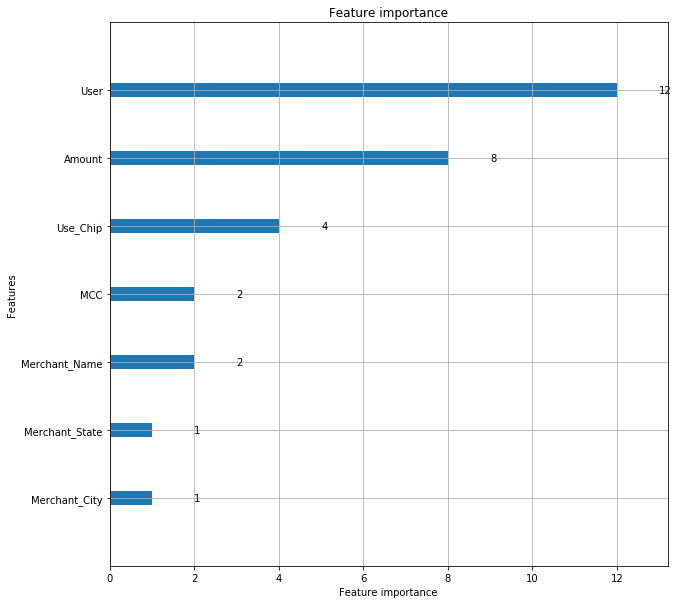

In [25]:
# Plot the feature importance
plot_importance(model, figsize=(10, 10));

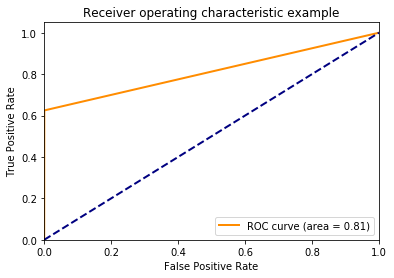

In [26]:
# Plot the ROC curve
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

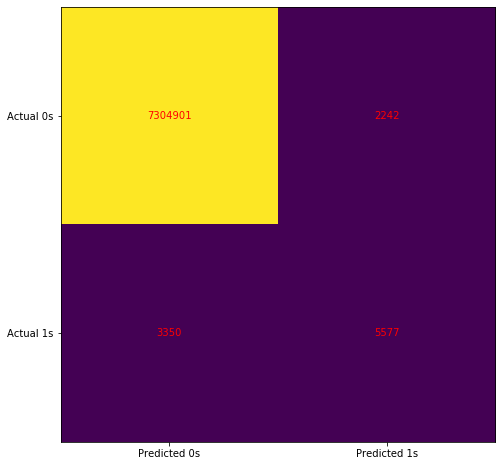

In [27]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #517152;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">6.  Conclusion
    </h3>
</div>

After training the models, we can see that the **XGBoost** model performed the best with an **AUC** of **0.999**. The **LGBClassifier** model performed the second best with an **AUC** of **0.998**. The **Logistic Regression** model performed the worst with an **AUC** of **0.998**.

These values represent the **AUC** of the models on the **test** set. The **AUC** of the models on the **train** set are as follows: **XGBoost** = **0.999**, **LGBClassifier** = **0.999**, **Logistic Regression** = **0.999**. 

The **AUC** of the models on the **test** set are very close to the **AUC** of the models on the **train** set. This means that the models are not overfitting the data.

The values mean that in predicting for is fraud or is not fraud, the model is correct 99.9% of the time, which is desired when working with financial data.

<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #1E72d1;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">7.  Author
    </h3>
</div>

**JASON ROBINSON**<br>
Data Science, Data Engineer, Machine Learning Engineer